In [113]:
#import all required library

import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [114]:
# reading the csv file
data = pd.read_csv("https://raw.githubusercontent.com/sg758253/sg1205/main/ADVDS/project1/forestfires.csv")

In [115]:
# display the data
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [116]:
# check null data
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [117]:
# describing the data
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [118]:
data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [119]:
data['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [120]:
# order label encoding for month and week day
order_label_for_month = {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
order_label_for_day = {"mon":1,"tue":2,"wed":3,"thu":4,"fri":5,"sat":6,"sun":7}

data['month'] = data['month'].map(order_label_for_month)
data['day'] = data['day'].map(order_label_for_day)
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [121]:
# display data type
data.dtypes

X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

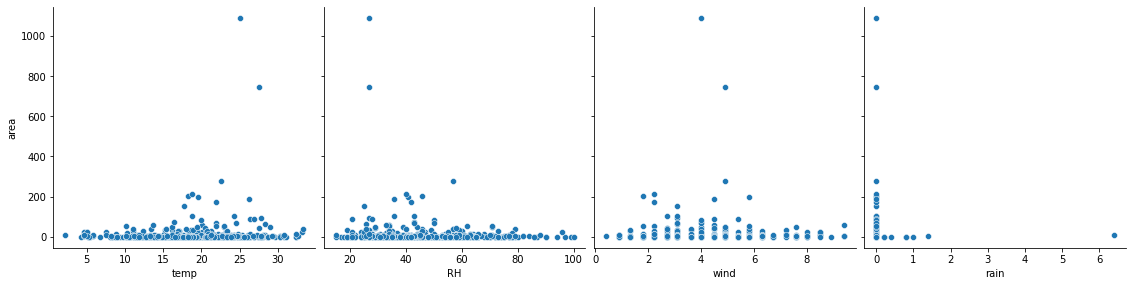

'\nplt.rcParams[\'figure.figsize\'] = [8, 8]\nsns.set(style = "white", font_scale = 1.3)\nscat = sns.scatterplot(x = data[\'temp\'],y =  data[\'area\'])\nscat.set(title = "Scatter Plot of Area and Temperature", xlabel = "Temperature", ylabel = "Area");\n'

In [122]:
# scatter plot
sbn.pairplot(data, x_vars=['temp','RH', 'wind','rain'], y_vars='area', height=4, aspect=1, kind='scatter')
plt.show()
'''
plt.rcParams['figure.figsize'] = [8, 8]
sns.set(style = "white", font_scale = 1.3)
scat = sns.scatterplot(x = data['temp'],y =  data['area'])
scat.set(title = "Scatter Plot of Area and Temperature", xlabel = "Temperature", ylabel = "Area");
'''


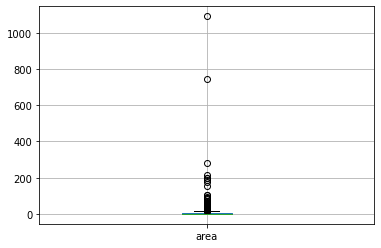

In [123]:
data.boxplot(column="area")

In [124]:
norm_area = pd.DataFrame(data["area"])
data["norm_area"]=np.log10(norm_area+1)

Normalized area column is still skewed but not as badly

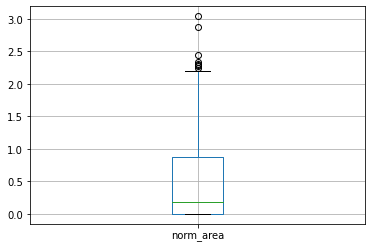

In [125]:
data.boxplot(column=["norm_area"])

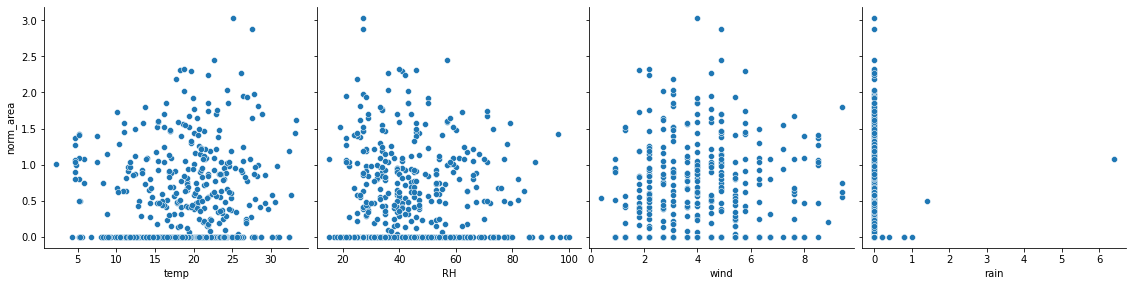

In [126]:
sbn.pairplot(data, x_vars=['temp','RH', 'wind','rain'], y_vars='norm_area', height=4, aspect=1, kind='scatter')
plt.show()

# For temp

In [127]:
# creating X as matrix and y as target vector
X = data[['temp']]
y = data['norm_area']
y.shape, X.shape

((517,), (517, 1))

In [128]:
#spliting data into 80-20.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=51)
print("Shape of X_train= ",X_train.shape)
print("Shape of X_test= ",X_test.shape)
print("Shape of y_train= ",y_train.shape)
print("Shape of y_test= ",y_test.shape)

Shape of X_train=  (413, 1)
Shape of X_test=  (104, 1)
Shape of y_train=  (413,)
Shape of y_test=  (104,)


In [129]:
# creating object of LinearRegression
lr_model_temp = LinearRegression()
lr_model_temp.fit(X_train,y_train)
print("Intercept value: ",lr_model_temp.intercept_)
print("Coefficient value: ",lr_model_temp.coef_)


Intercept value:  0.37997891985108717
Coefficient value:  [0.00507069]


Linear model area is: 0.3799 + 0.00507 * temp

In [130]:
# Prediction and scoring
predictions = lr_model_temp.predict(X_test)
lr_model_temp.score(X_test,y_test)

0.0008335395791827516

In [131]:
# Error Scores
mse_temp = mean_squared_error(y_test, predictions)
r2_temp = r2_score(y_test, predictions)
print ("Mean Squared Error for temp: ", mse_temp)
print ("R2 Score for temp: ", r2_temp)

Mean Squared Error for temp:  0.386210664169754
R2 Score for temp:  0.0008335395791827516


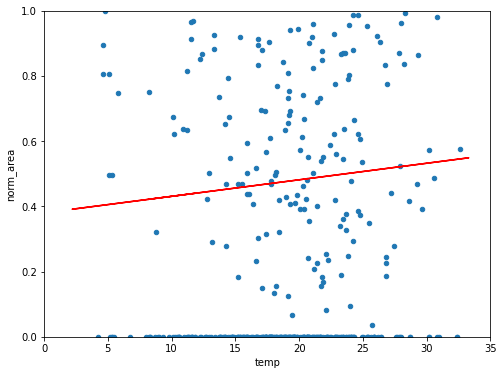

In [132]:
data.plot(kind="scatter",x="temp",y="norm_area",figsize=(8,6))
plt.axis([0,35,0,1])
plt.plot(X,lr_model_temp.intercept_+lr_model_temp.coef_*X,"r")
plt.show()

# For RH

In [133]:
# creating X as matrix and y as target vector
X = data[['RH']]
y = data['norm_area']
y.shape, X.shape

((517,), (517, 1))

In [134]:
#spliting data into 80-20.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=51)
print("Shape of X_train= ",X_train.shape)
print("Shape of X_test= ",X_test.shape)
print("Shape of y_train= ",y_train.shape)
print("Shape of y_test= ",y_test.shape)

Shape of X_train=  (413, 1)
Shape of X_test=  (104, 1)
Shape of y_train=  (413,)
Shape of y_test=  (104,)


In [135]:
# creating LinearRegression model for RH
lr_model_RH = LinearRegression()
lr_model_RH.fit(X_train,y_train)
print("Intercept value: ",lr_model_RH.intercept_)
print("Coefficient value: ",lr_model_RH.coef_)

Intercept value:  0.5098270848261182
Coefficient value:  [-0.0007761]


In [136]:
# Prediction and scoring
predictions = lr_model_RH.predict(X_test)
lr_model_RH.score(X_test,y_test)

0.0035655800781130287

In [137]:
# Error Scores
mse_RH = mean_squared_error(y_test, predictions)
r2_RH = r2_score(y_test, predictions)
print ("Mean Squared Error for RH: ", mse_RH)
print ("R2 Score for RH: ", r2_RH)

Mean Squared Error for RH:  0.38515464075681227
R2 Score for RH:  0.0035655800781130287


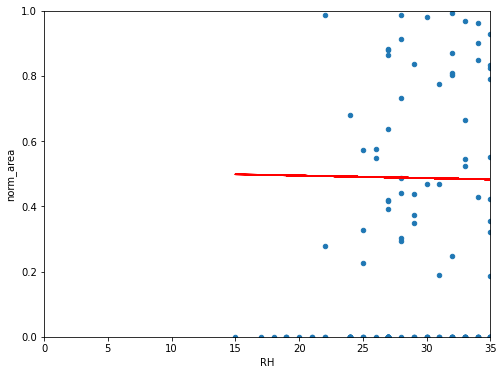

In [138]:
data.plot(kind="scatter",x="RH",y="norm_area",figsize=(8,6))
plt.axis([0,35,0,1])
plt.plot(X,lr_model_RH.intercept_+lr_model_RH.coef_*X,"r")
plt.show()

# For wind

In [139]:
# creating X as matrix and y as target vector
X = data[['wind']]
y = data['norm_area']
y.shape, X.shape

((517,), (517, 1))

In [140]:
#spliting data into 80-20.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=51)
print("Shape of X_train= ",X_train.shape)
print("Shape of X_test= ",X_test.shape)
print("Shape of y_train= ",y_train.shape)
print("Shape of y_test= ",y_test.shape)

Shape of X_train=  (413, 1)
Shape of X_test=  (104, 1)
Shape of y_train=  (413,)
Shape of y_test=  (104,)


In [141]:
# creating LinearRegression model for RH
lr_model_wind = LinearRegression()
lr_model_wind.fit(X_train,y_train)
print("Intercept value: ",lr_model_wind.intercept_)
print("Coefficient value: ",lr_model_wind.coef_)

Intercept value:  0.35872534906914255
Coefficient value:  [0.02876634]


In [142]:
# Prediction and scoring
predictions = lr_model_wind.predict(X_test)
lr_model_wind.score(X_test,y_test)

-0.011854722925675132

In [143]:
# Error Scores
mse_wind = mean_squared_error(y_test, predictions)
r2_wind = r2_score(y_test, predictions)
print ("Mean Squared Error for wind: ", mse_wind)
print ("R2 Score for wind: ", r2_wind)

Mean Squared Error for wind:  0.39111509449570536
R2 Score for wind:  -0.011854722925675132


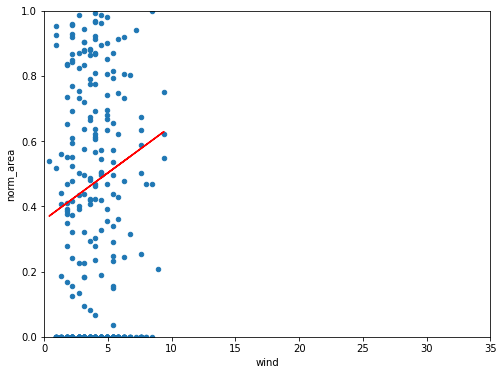

In [144]:
data.plot(kind="scatter",x="wind",y="norm_area",figsize=(8,6))
plt.axis([0,35,0,1])
plt.plot(X,lr_model_wind.intercept_+lr_model_wind.coef_*X,"r")
plt.show()

# For rain

In [145]:
# creating X as matrix and y as target vector
X = data[['rain']]
y = data['norm_area']
y.shape, X.shape

((517,), (517, 1))

In [146]:
#spliting data into 80-20.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=51)
print("Shape of X_train= ",X_train.shape)
print("Shape of X_test= ",X_test.shape)
print("Shape of y_train= ",y_train.shape)
print("Shape of y_test= ",y_test.shape)

Shape of X_train=  (413, 1)
Shape of X_test=  (104, 1)
Shape of y_train=  (413,)
Shape of y_test=  (104,)


In [147]:
# creating LinearRegression model for RH
lr_model_rain = LinearRegression()
lr_model_rain.fit(X_train,y_train)
print("Intercept value: ",lr_model_rain.intercept_)
print("Coefficient value: ",lr_model_rain.coef_)

Intercept value:  0.4737118959049553
Coefficient value:  [0.06337625]


In [148]:
# Prediction and scoring
predictions = lr_model_rain.predict(X_test)
lr_model_rain.score(X_test,y_test)

-0.005540490799117448

In [149]:
# Error Scores
mse_rain = mean_squared_error(y_test, predictions)
r2_rain = r2_score(y_test, predictions)
print ("Mean Squared Error for rain: ", mse_rain)
print ("R2 Score for rain: ", r2_rain)

Mean Squared Error for rain:  0.38867443632720283
R2 Score for rain:  -0.005540490799117448


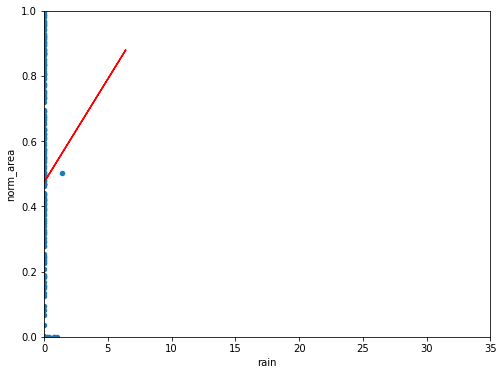

In [150]:
data.plot(kind="scatter",x="rain",y="norm_area",figsize=(8,6))
plt.axis([0,35,0,1])
plt.plot(X,lr_model_rain.intercept_+lr_model_rain.coef_*X,"r")
plt.show()

# Tabluate data
Linear regression is not working on this dataset. 

In [152]:
# Display MSE and R2 in table form
tabulateData = {'MSE':[mse_temp, mse_RH, mse_wind, mse_rain],
        'R2':[r2_temp,r2_RH,r2_wind,r2_rain]}
tabulateDF = pd.DataFrame(tabulateData, index =['Temp', 'RH','Wind','Rain'])
tabulateDF

,MSE,R2
Temp,0.386211,0.000834
RH,0.385155,0.003566
Wind,0.391115,-0.011855
Rain,0.388674,-0.005540
